# ISUP 2020 Final Exam, July 29th.
## Machine Learning for Predictive Analytics in Business (CCMVI2085U)

### Preamble

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed to 73 corresponding to exam no.: S133708
rs = 73

## Section 1
**1) Load the dataset into your Jupyter notebook and name it `df`**

In [2]:
df = pd.read_csv("CCMVI2085U_bike_sharing_rental.csv", header = 0)
df.head()

,dteday,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,casual
0,09/02/2012,0,4,1,1,0.265000,0.562083,0.194037,3667,163
1,27/12/2012,0,4,1,2,0.254167,0.652917,0.350133,1867,247
2,09/06/2011,0,4,1,2,0.808333,0.568333,0.149883,3352,563
3,27/02/2012,0,1,1,1,0.366667,0.490833,0.268033,4069,253
4,27/05/2012,0,0,0,1,0.690000,0.697083,0.215171,3308,3283


**2) Report the dimension of `df`**

In [3]:
df.shape

(500, 10)

The dataset consists of 500 observations and 10 variables (of which the first variable is the date)

**3) Show the last 12 observations/rows of `df`**

In [4]:
df.tail(12)

,dteday,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,casual
488,09/08/2011,0,2,1,1,0.775000,0.570417,0.151121,3695,907
489,23/04/2011,0,6,0,2,0.460000,0.887917,0.230725,2574,1462
490,23/09/2011,0,5,1,2,0.609167,0.972500,0.078367,2137,258
491,03/10/2011,0,1,1,2,0.384167,0.760833,0.083346,3240,330
492,30/09/2011,0,5,1,1,0.564167,0.647500,0.206475,4372,830
493,09/12/2011,0,5,1,1,0.290833,0.695833,0.082717,3359,261
494,14/09/2011,0,3,1,1,0.673333,0.697083,0.167300,4138,647
495,02/07/2011,0,6,0,1,0.738333,0.444583,0.115062,2915,2204
496,16/04/2011,0,6,0,3,0.430833,0.888333,0.340808,674,121
497,28/10/2011,0,5,1,2,0.330833,0.585833,0.229479,3291,456


**4) Show the variable date types of `df`**

In [5]:
df.dtypes

dteday         object
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
registered      int64
casual          int64
dtype: object

**5) Summarize the numeric variables of `df`**

The dataset consists of three continuous numeric variables: `temp`, `hum` and `windspeed`, as well as two discrete numeric variables: `registered` and `casual`.

In [6]:
con_num_lst = ['temp','hum','windspeed']
dis_num_lst = ['registered','casual']

df[con_num_lst + dis_num_lst].describe()

,temp,hum,windspeed,registered,casual
count,500.000000,500.000000,500.000000,500.000000,500.00000
mean,0.484558,0.627916,0.191074,3605.084000,810.03400
std,0.185145,0.143338,0.077243,1573.874688,671.70654
min,0.097391,0.000000,0.045404,20.000000,2.00000
25%,0.325625,0.518941,0.135580,2391.500000,280.25000
50%,0.474166,0.621666,0.183775,3664.500000,677.00000
75%,0.653541,0.731562,0.231664,4760.000000,1058.25000
max,0.861667,0.972500,0.507463,6898.000000,3410.00000


## Section 2
**Use the seaborn.PairGrid to draw a set of pairwise plots of all variables in `df`, where**

**1) Scatter plots in the upper triangle (in blue color)**

**2) Histograms on the diagonal (in gray color)**

**3) Correlation coefficients in the lower triangle**

In [7]:
%matplotlib inline
import seaborn as sns

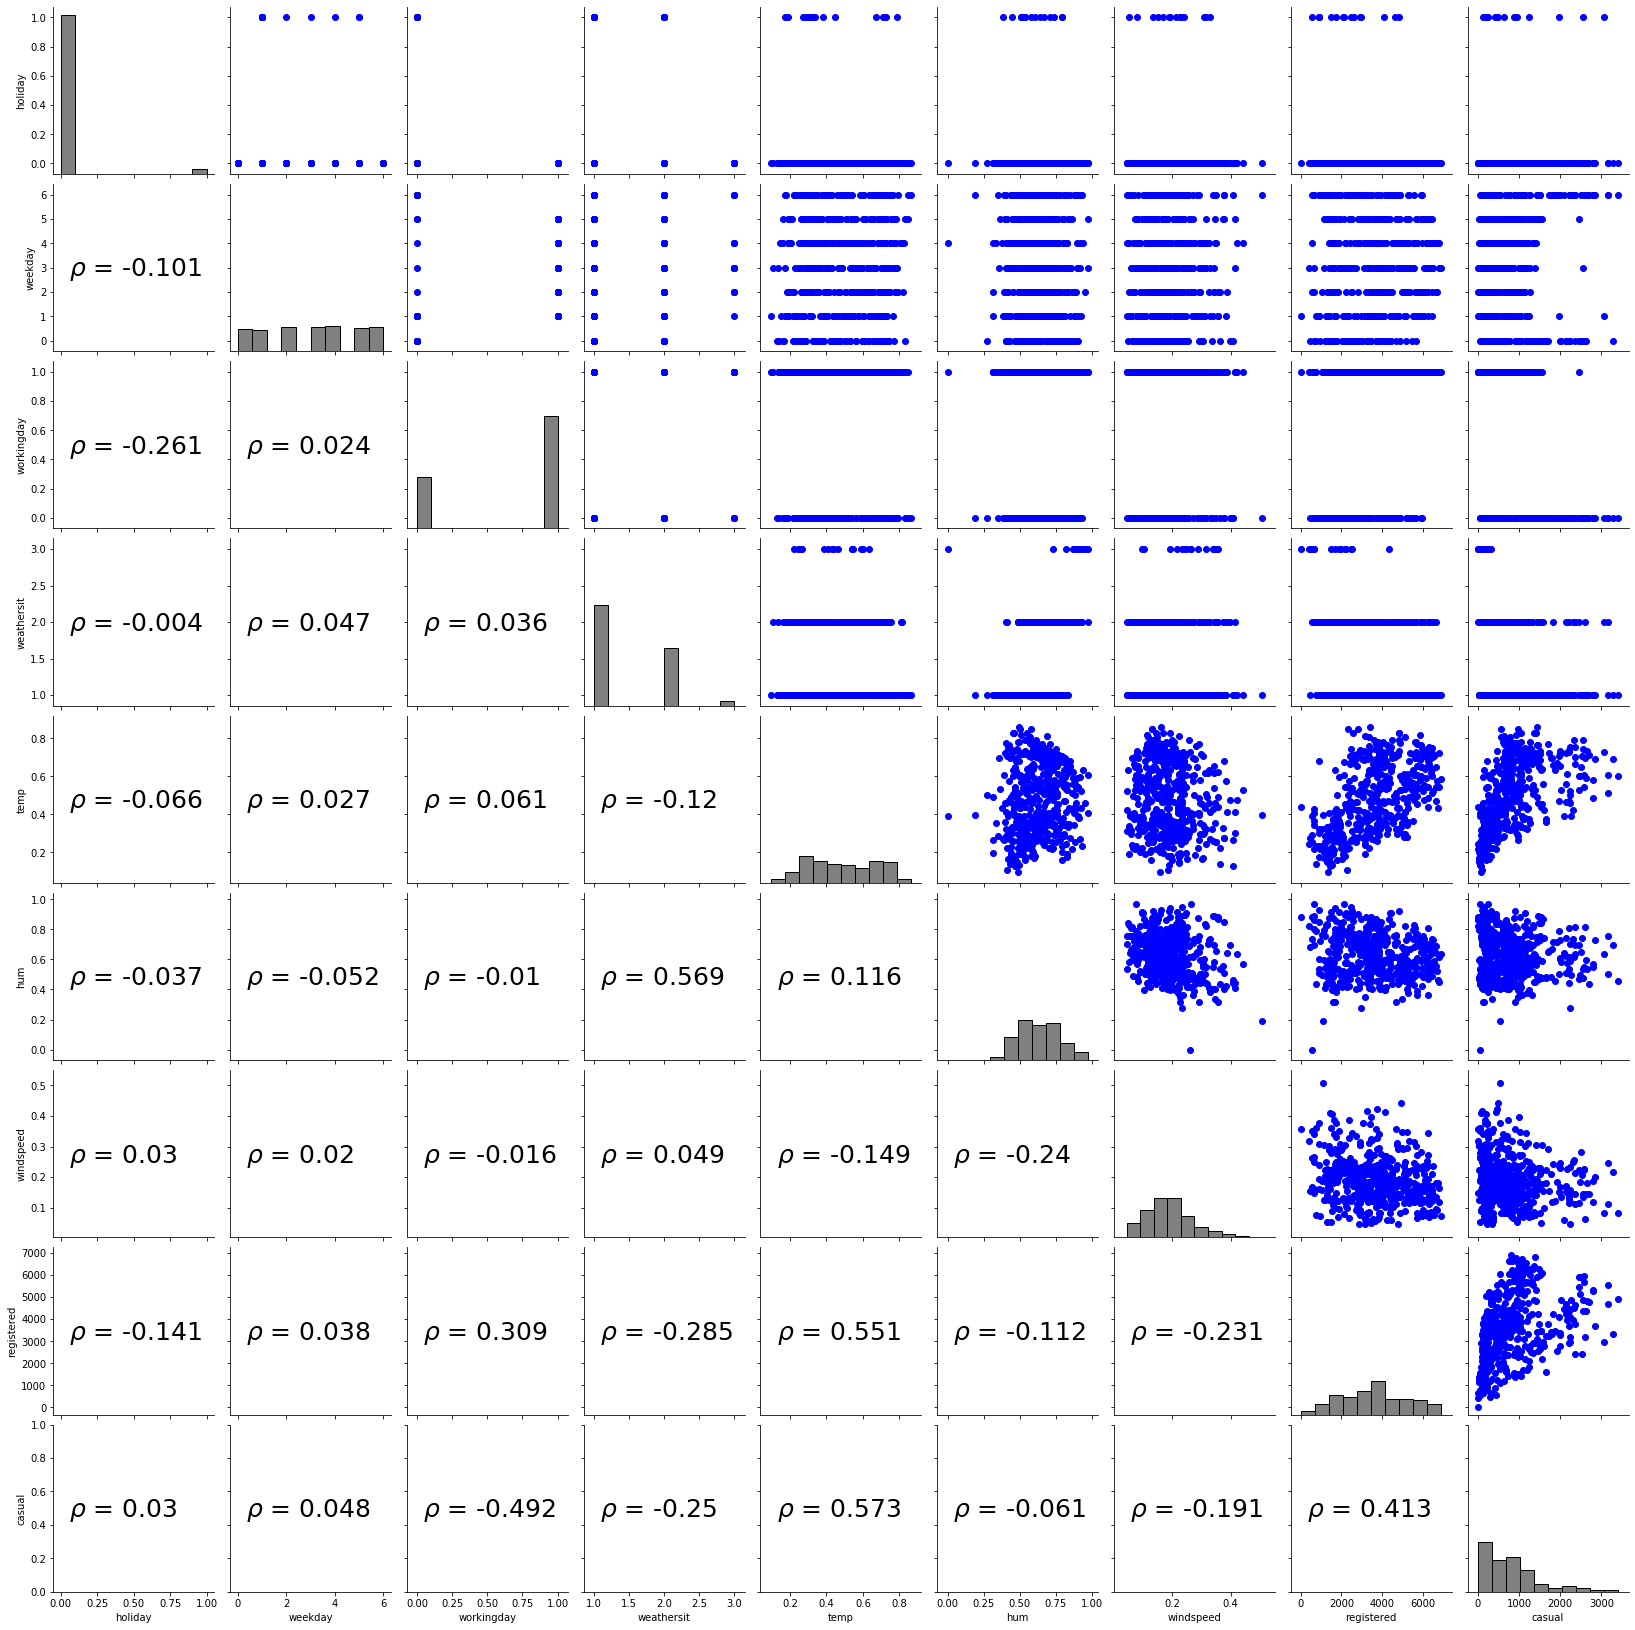

In [8]:
g = sns.PairGrid(data = df.iloc[:,1:]) #excludes 'date' variable

def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 3))
    ax = plt.gca()
    ax.annotate(label, xy = (0.1, 0.45), size = 25, xycoords = ax.transAxes)
    
g.map_lower(corr)
g.map_upper(plt.scatter, color = 'blue')
g.map_diag(plt.hist, color = 'grey', edgecolor =  'k');

## Section 3

**1) Create a dictionary and name it `cc`**

In [9]:
cc = {}

In [10]:
# target key
casual_arr = df['casual'].to_numpy
cc['target'] = casual_arr()

In [11]:
# data key
data_arr = df.iloc[:,1:-1].to_numpy # Using the dataframe w/o dates and target variable
cc['data'] = data_arr()

In [12]:
# feature_name key
fname_lst = df.iloc[:,1:-1].columns.to_numpy # Get column names of numeric features
cc['feature_name'] = fname_lst()
# Just a short comment: I assume that 'casual' shouldn't be included in this array
# as it is used in the 'target_name' key. So this feature name is left out of the
# the array on purpose. Also date-column is excluded as for the other questions.

In [13]:
# target_name key
cc['target_name'] = np.array(['casual']).astype(dtype=object)

In [14]:
cc

{'target': array([ 163,  247,  563,  253, 3283,  775,  243, 1236,  227,  477, 1138,
         247,   54,  665, 1488,   95, 1027, 1026, 1434,  630,  137, 1077,
         833,  618, 1729,  968, 2345,  199,  515,  259,  303,  155,  177,
         205, 1405,  713,   86,  440,  888,  775, 1582,  991, 1448,  738,
        1782,  620, 1100,  373,  532, 1023,  257,  795,  260,  639,  676,
         318,  424, 1081,  755,   83,  106,  231,  888,  203,  349, 3410,
         754,  310,  123,  409,  983,  968,  326,  108, 1182, 1045, 1363,
         661,  244,  143,  559,  109,  834,  694,  333,  428,  642, 1504,
         867,  467,  100,  688, 1029, 1869,   74,  149,  117, 2551, 1031,
         159,  178,  331,  347,  767, 1005,  321,  126,  192,  316,  255,
         569,  529,  955,  178, 2355,  324, 2657, 1318,  956, 1278,  981,
         190, 2153,  472,  616,  150,   54,  203,  874, 1051, 1651, 2469,
        1140,  684, 1298,  762,   57,  611,  692,  502,  275,  337,  466,
         429,   47,  486,   

**2) Randomly split the data into training and test sets. The split ratio is 80:20 (i.e., 80% for training and 20% for testing). Use your allocated random seed if applicable. Name the training input feature data to `x_train`; name the test input feature data to `x_test`; name the training target data to `y_train`; name the test target data to `y_test`.**

In [15]:
x, y = cc.get("data"), cc.get("target")

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

**3) Train linear regression, decision tree, random forest, neural network models using the training data and make predictions using the test data. You can either write your own functions or use third-party libraries such as sklearn to train and test your models. You can set the model hyperparameters with the values you think are appropriate and use your allocated random seed if applicable.**

Note that as the target variable 'casual' is numerical with 438 unique values (using `df.casual.unique().size`) all models are implemented for regression.

In [17]:
# Create dictionaries to save model predictions
y_pred_train = {}
y_pred_test = {}
model_list = {}

**Linear Regression**

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # No parameters changed.
lin_reg.fit(x_train, y_train)

y_pred_train["LR"] = lin_reg.predict(x_train)
y_pred_test["LR"] = lin_reg.predict(x_test)
model_list["LR"] = lin_reg

**Decision tree**

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=rs) # criterion is MSE as default
tree_reg.fit(x_train, y_train)

y_pred_train["DT"] = tree_reg.predict(x_train)
y_pred_test["DT"] = tree_reg.predict(x_test)
model_list["DT"] = tree_reg

**Random Forest**

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=rs) # criterion is MSE as default
rf_reg.fit(x_train, y_train)

y_pred_train["RF"] = rf_reg.predict(x_train)
y_pred_test["RF"] = rf_reg.predict(x_test)
model_list["RF"] = rf_reg

**Artificial Neural Networks:** Multi-Layer Perception

In [21]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(random_state=rs, max_iter=1000) 
#     Default 'relu' choice of activation function and increased max number of iterations from 200.
mlp_reg.fit(x_train, y_train)

y_pred_train["MLP"] = mlp_reg.predict(x_train)
y_pred_test["MLP"] = mlp_reg.predict(x_test)
model_list["MLP"] = mlp_reg

**4) Write your own Python function to calculate the mean squared error between the model predictions and the ground truth target values. The function name is `mse_new`. Use your own function `mse_new` to report the model's prediction performance for the test data. In the meantime, show the mean squared errors calculated from your `mse_new` function are equal to the `sklearn` library's `mean_squared_error` function. Compare and discuss the performance of these four models.**

The formula for MSE is given by:
$$MSE=\frac{1}{n}=\sum_{i=1}^{n}(y_i-\hat{y}_i)$$
Where $y_i$ is the observed value of the target variable, $\hat{y}_i$ is the predicted value of target variable and $n$ is the number of observations.

In [22]:
def mse_new(y, y_hat):
    n = len(y)
    sum_sq_error = 0
    for i in range (0,n):
        error = y[i] - y_hat[i]
        squared_error = error**2 
        sum_sq_error = sum_sq_error + squared_error
    MSE = sum_sq_error/n
    return(MSE)

In [23]:
from sklearn.metrics import mean_squared_error

results = {}
algo_list = list(model_list.keys())

for algo in algo_list:
    results[algo] = {'mse_new': mse_new(y_test, y_pred_test[algo]),
                     'mean_squared_error': mean_squared_error(y_test, y_pred_test[algo])}
df_results = pd.DataFrame.from_dict(results).T
df_results

,mse_new,mean_squared_error
LR,117241.711259,117241.711259
DT,130416.070000,130416.070000
RF,84056.524257,84056.524257
MLP,325829.344695,325829.344695


**Answer:** In conclusion of the `mse_new` function, we can see that this outputs the same as `sklearn`'s built-in function.

When assessing the performance of the models, a lower MSE is preferred and most models' cost functions are related to this MSE measure. As out-of-sample prediction is the main objective of most Machine Learning work, measuring MSE on the training set is unnessesary and may lead to invalid conclusion, as a low in-sample MSE can be the result of overfitting.

For the selected models, the random forest model have the best out-of-sample fit (i.e. lowest MSE on the test set) and should be the prefered model. _However_, adjusting the hyperparameters in the models may be beneficial and provide better models for prediction, such adjustments could be (but not exclusively): 

- Determining max nodes and depth in Decision Tree and Random Forest to avoid overfitting
- Using more layers and/or other activation functions in ANN
- Using another form of neural network (i.e. other than MLP)

## Section 4

**1) Decompose variable `dteday` of `df` into three new variables (i.e., `day`, `month`, `year`) into `df` and remove `dteday` from `df`.**

Note that I do this in a new dataframe

In [24]:
df2 = df.copy()
df2['day'] = pd.DatetimeIndex(df2['dteday']).day
df2['month'] = pd.DatetimeIndex(df2['dteday']).month
df2['year'] = pd.DatetimeIndex(df2['dteday']).year
df2 = df2.drop(columns=['dteday'])

In [25]:
df2.head()

,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,casual,day,month,year
0,0,4,1,1,0.265000,0.562083,0.194037,3667,163,2,9,2012
1,0,4,1,2,0.254167,0.652917,0.350133,1867,247,27,12,2012
2,0,4,1,2,0.808333,0.568333,0.149883,3352,563,6,9,2011
3,0,1,1,1,0.366667,0.490833,0.268033,4069,253,27,2,2012
4,0,0,0,1,0.690000,0.697083,0.215171,3308,3283,27,5,2012


**2) Convert the data types of variables `day`, `month`, `year` into `int64`.**

In [26]:
df2.dtypes

holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
registered      int64
casual          int64
day             int64
month           int64
year            int64
dtype: object

**Answer:** The variables for day month and year is already `int64`

**3) Train and test the linear regression, decision tree, random forest, and neural network models in Section 3 using the same data split settings and model hyperparameter settings. Show and discuss if the model prediction performance can be improved and why.**

In [27]:
# Split data set
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2) # Random state = None by default

# Create dictionaries to save model predictions
y_pred_train2 = {}
y_pred_test2 = {}

**Linear Regression**

In [28]:
lin_reg2 = LinearRegression() # No parameters changed.
lin_reg2.fit(x_train2, y_train2)

y_pred_train2["LR"] = lin_reg2.predict(x_train2)
y_pred_test2["LR"] = lin_reg2.predict(x_test2)

**Decision tree**

In [29]:
tree_reg2 = DecisionTreeRegressor() # criterion is MSE as default
tree_reg2.fit(x_train2, y_train2)

y_pred_train2["DT"] = tree_reg2.predict(x_train2)
y_pred_test2["DT"] = tree_reg2.predict(x_test2)

**Random Forest**

In [30]:
rf_reg2 = RandomForestRegressor() # criterion is MSE as default
rf_reg2.fit(x_train2, y_train2)

y_pred_train2["RF"] = rf_reg2.predict(x_train2)
y_pred_test2["RF"] = rf_reg2.predict(x_test2)

**Artificial Neural Networks:** Multi-Layer Perception

In [31]:
mlp_reg2 = MLPRegressor(max_iter=1000) 
#     Default 'relu' choice of activation function and increased max number of iterations from 200.
mlp_reg2.fit(x_train2, y_train2)

y_pred_train2["MLP"] = mlp_reg2.predict(x_train2)
y_pred_test2["MLP"] = mlp_reg2.predict(x_test2)

In [32]:
results2 = {}

for algo in algo_list:
    results2[algo] = {'mean_squared_error': mean_squared_error(y_test2, y_pred_test2[algo])}

df_results2 = pd.DataFrame.from_dict(results2).T
df_results2

,mean_squared_error
LR,141089.939367
DT,144299.500000
RF,95897.590095
MLP,405165.094624


**Discussion:** Removing the random state hyperparameter from `sklearn`'s `train_test_split` and in the estimations yields different results than in section 3. Random Forest is still the best model for out-of-sample prediction using MSE as the criterion.

Potential (model-specific) improvements of the models are discussed in Question 4 of Section 3, but two general improvements of the data could be: 

- Changing the categorical `weathersit` variable into dummies.
- Standardizing the numerical variables, e.g. z-scores.

These improvements will be done in the following code:

In [33]:
improved_df = df.copy() # copy of dataset

improved_df['weathersit'] = improved_df['weathersit'].astype('object') # change weathersit to object

improved_df_temp = pd.get_dummies(improved_df['weathersit'], drop_first=True) # create dummies

improved_df = pd.concat([improved_df, improved_df_temp], axis=1, ignore_index=False) #concatenate

improved_df = improved_df.drop(columns=['weathersit']) #drop original weathersit

improved_df.head()

,dteday,holiday,weekday,workingday,temp,hum,windspeed,registered,casual,2,3
0,09/02/2012,0,4,1,0.265000,0.562083,0.194037,3667,163,0,0
1,27/12/2012,0,4,1,0.254167,0.652917,0.350133,1867,247,1,0
2,09/06/2011,0,4,1,0.808333,0.568333,0.149883,3352,563,1,0
3,27/02/2012,0,1,1,0.366667,0.490833,0.268033,4069,253,0,0
4,27/05/2012,0,0,0,0.690000,0.697083,0.215171,3308,3283,0,0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

rescaled_np = improved_df[con_num_lst + dis_num_lst].to_numpy()

scaler.fit(rescaled_np)

improved_df[con_num_lst + dis_num_lst] = scaler.transform(rescaled_np)

improved_df.head()

,dteday,holiday,weekday,workingday,temp,hum,windspeed,registered,casual,2,3
0,09/02/2012,0,4,1,-1.187062,-0.459747,0.038403,0.039379,-0.964234,0,0
1,27/12/2012,0,4,1,-1.245632,0.174594,2.061283,-1.105440,-0.839054,1,0
2,09/06/2011,0,4,1,1.750517,-0.416100,-0.533797,-0.160964,-0.368139,1,0
3,27/02/2012,0,1,1,-0.637390,-0.957323,0.997333,0.295056,-0.830112,0,0
4,27/05/2012,0,0,0,1.110739,0.483028,0.312283,-0.188949,3.685304,0,0


**Answer:** Unfortunately I didn't have time to run the models using the `improved_df` dataframe I just created. But basically what I have done is replacing 'weathersit' by two dummies (note that 'weathersit' = 1 is default) and then standardized (using standard scaler) the numerical variables in the feature set: `temp`, `hum`, `windspeed`, `registered` as well as the target variable `casual`.
This should improve the performance as well as the validity of the results.
